In [17]:
from tumor_model.model import TumorModel, compute_MTD
from mesa.batchrunner import BatchRunner
import numpy as np

fixed_params = {
    "width": 20,
    "height": 20,
    "treatment_cycles": 0
}

variable_params = {
    "param_scale": np.linspace(0.5, 1.0, num=10)
}

batch_run = BatchRunner(
    TumorModel,
    variable_params,
    fixed_params,
    iterations=10,
    max_steps=85,
    model_reporters={"MTD": compute_MTD}
)

batch_run.run_all()

100it [04:16,  2.57s/it]


,param_scale,Run,MTD,width,height,treatment_cycles
0,0.5,0,40.620192,20,20,0
1,0.5,1,29.580399,20,20,0
2,0.5,2,42.720019,20,20,0
3,0.5,3,18.708287,20,20,0
4,0.5,4,40.620192,20,20,0
...,...,...,...,...,...,...
95,1.0,95,62.449980,20,20,0
96,1.0,96,66.708320,20,20,0
97,1.0,97,61.237244,20,20,0
98,1.0,98,58.949131,20,20,0


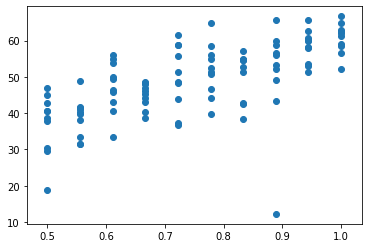

In [29]:
import matplotlib.pyplot as plt

run_data = batch_run.get_model_vars_dataframe()
run_data.head()
plt.scatter(run_data.param_scale, run_data.MTD)
run_data

In [39]:
df = run_data[['param_scale','MTD']]
df.groupby('param_scale').agg(['var', 'mean'])

MTD           
                    var       mean
param_scale                       
0.500000      73.053533  37.104606
0.555556      28.962466  38.844997
0.611111      49.293940  47.361751
0.666667      11.332370  44.914373
0.722222      77.156329  50.055562
0.777778      52.743127  51.937763
0.833333      43.614353  50.356202
0.888889     219.563992  50.694106
0.944444      20.751465  58.320868
1.000000      17.858408  60.654163